(145, 145, 200)


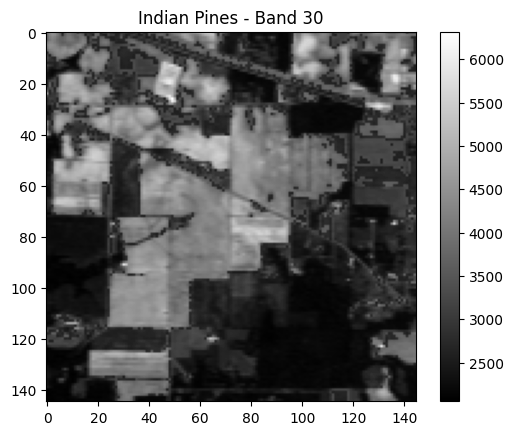

TypeError: unhashable type: 'numpy.ndarray'

In [3]:
import scipy.io
import matplotlib.pyplot as plt
import apply_stripes as ap

## testing
# [row][col] => # apply to all rows depending on the x pos [ : ] [col]
f = scipy.io.loadmat("../../datasets/Indian_pines_corrected.mat")
indian_pines_data = f['indian_pines_corrected']
print(indian_pines_data.shape)
# Choose a specific band to visualize (you can change the band index as needed)
band_index = 29
selected_band = indian_pines_data[:, :, band_index]

# Plot the selected band
plt.imshow(selected_band, cmap='gray')
plt.title(f"Indian Pines - Band {band_index + 1}")
plt.colorbar()
plt.show()
ap.add_stripes(indian_pines_data)
